In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
color = sns.color_palette()
sns.set_style('darkgrid')

(19,)


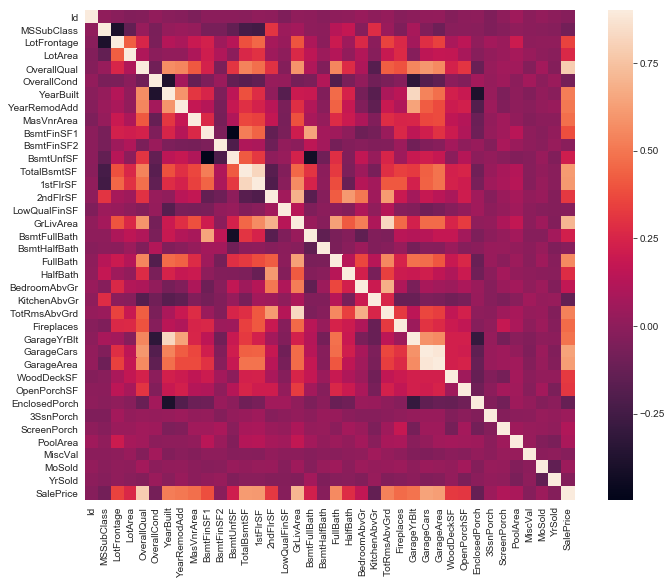

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

all_data_na = (train_data.isnull().sum() / len(train_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
print(all_data_na.shape)

corrmat = train_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#train_data[train_data['Id'] == 1299]



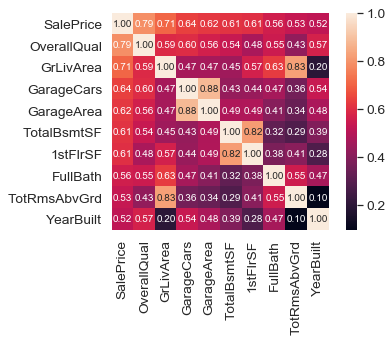

In [3]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

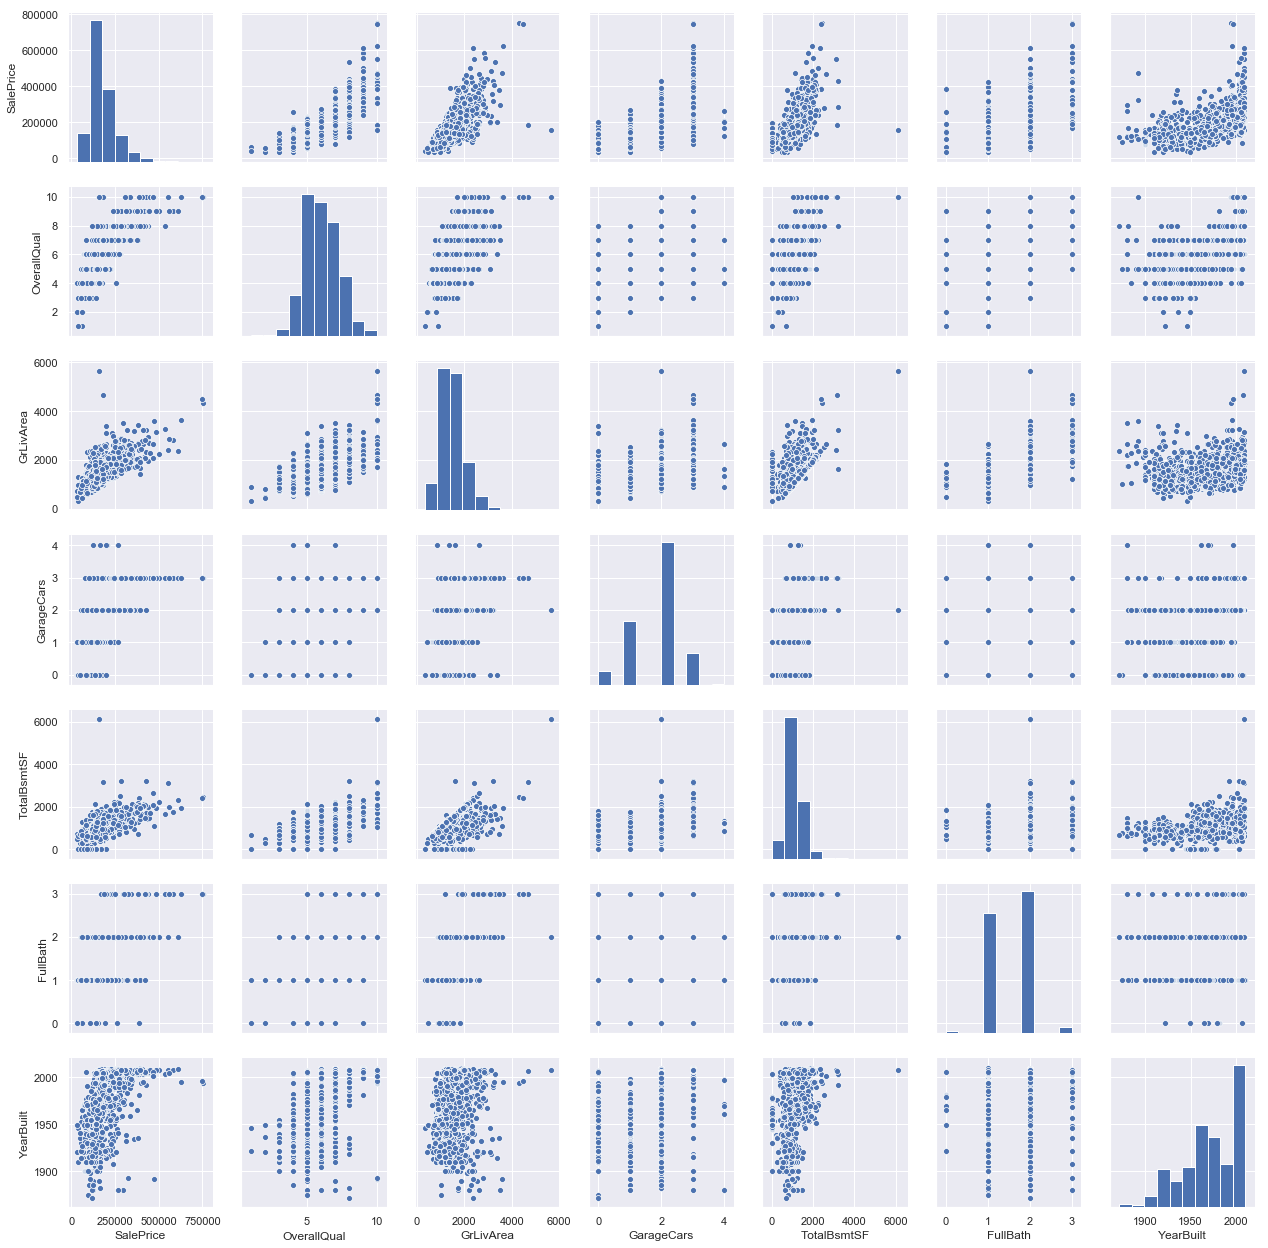

In [4]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], height = 2.5)
plt.show();

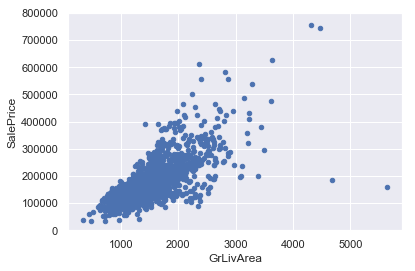

In [5]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

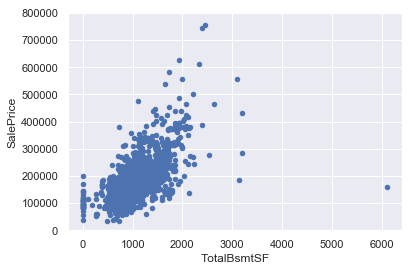

In [6]:
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


In [7]:
#take out the outlier
train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_no_outlier= train_data.drop(train_data[train_data['Id'] == 524].index)
print(train_no_outlier['GrLivArea'])
#train_no_outlier=train_data.drop(train_data[train_data['TotalBsmtSF'] > 5000].index)

0       1710
1       1262
2       1786
3       1717
4       2198
5       1362
6       1694
7       2090
8       1774
9       1077
10      1040
11      2324
12       912
13      1494
14      1253
15       854
16      1004
17      1296
18      1114
19      1339
20      2376
21      1108
22      1795
23      1060
24      1060
25      1600
26       900
27      1704
28      1600
29       520
        ... 
1430    1838
1431     958
1432     968
1433    1792
1434    1126
1435    1537
1436     864
1437    1932
1438    1236
1439    1725
1440    2555
1441     848
1442    2007
1443     952
1444    1422
1445     913
1446    1188
1447    2090
1448    1346
1449     630
1450    1792
1451    1578
1452    1072
1453    1140
1454    1221
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1458, dtype: int64


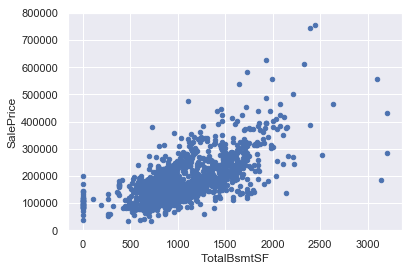

In [8]:
train_no_outlier=train_data.drop(train_data[train_data['TotalBsmtSF'] > 5000].index)

var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_no_outlier[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
#print(train_no_outlier)


In [9]:
small_train_set=train_no_outlier[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath','YearBuilt']]



 mu = 180935.54 and sigma = 79440.61



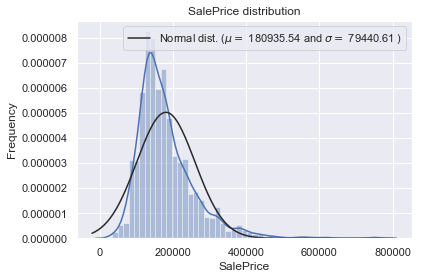

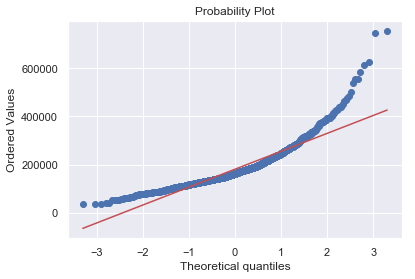

In [10]:
sns.distplot(train_data['SalePrice'] , fit=norm);


(mu, sigma) = norm.fit(train_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [11]:
small_set_missing_val=(small_train_set.isnull().sum()/len(small_train_set))*100

#print(small_set_missing_val)
# all have values.turn overallqual into categorical
small_train_set['OverallQual'].apply(str)
small_train_set['YearBuilt'].apply(str)

0       2003
1       1976
2       2001
3       1915
4       2000
5       1993
6       2004
7       1973
8       1931
9       1939
10      1965
11      2005
12      1962
13      2006
14      1960
15      1929
16      1970
17      1967
18      2004
19      1958
20      2005
21      1930
22      2002
23      1976
24      1968
25      2007
26      1951
27      2007
28      1957
29      1927
        ... 
1430    2005
1431    1976
1432    1927
1433    2000
1434    1977
1435    1962
1436    1971
1437    2008
1438    1957
1439    1979
1440    1922
1441    2004
1442    2008
1443    1916
1444    2004
1445    1966
1446    1962
1447    1995
1448    1910
1449    1970
1450    1974
1451    2008
1452    2005
1453    2006
1454    2004
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1459, dtype: object

In [12]:

#train_data.PoolQC.not("NAN")

#test_data

#all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
#all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
#missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})




missing_val=(train_data.isnull().sum()/len(train_data))*100
missing_val = missing_val.drop(missing_val[missing_val ==0].index).sort_values(ascending=False)
print(missing_val)
#missing_some=missing_val.drop(missing_val[missing_val >15].index)
missing_some=missing_val.drop(missing_val[missing_val >15].index)
missing_alot=missing_val.drop(missing_val[missing_val <15].index)
print(missing_alot.index)
#missing_some._get_numeric_data()
#index_array = missing_val.index
#train_ver1 = train_data



convlst={"MSSubClass", "OverallCond", "OverallQual", "YrSold", "YearBuilt","YearRemodAdd","GarageYrBlt","MoSold"}

for i in convlst:
    train_data[i]=train_data[i].apply(str)
#print(missing_alot)
ini_num=pd.DataFrame()

for i in missing_some.index:
    ini_num=pd.concat([ini_num,train_data[i]], axis=1, sort=False)
    #print(select_some)
#print(ini_num)
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    ini_num[col] = ini_num[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    ini_num[col] = ini_num[col].fillna('None')
ini_num["MasVnrType"] = ini_num["MasVnrType"].fillna("None")
ini_num['Electrical'] = ini_num['Electrical'].fillna(ini_num['Electrical'].mode()[0])    




Garageyr =train_data["GarageYrBlt"]
Garageyr.replace(['nan'], np.nan, inplace = True)
Garageyr.dropna(inplace=True)
val2005=Garageyr.value_counts().idxmax()

Garageyr_fill=pd.read_csv('train.csv')
Garageyr_fill=Garageyr_fill["GarageYrBlt"]
Garageyr_fill.replace(['NaN'], np.nan, inplace = True)
Garageyr_fill.fillna(float(val2005),inplace=True)

mean_val=ini_num['MasVnrArea'].mean()
num_filled=ini_num['MasVnrArea'].fillna(mean_val)
ini_num['MasVnrArea']=Garageyr_fill
ini_num["GarageYrBlt"]=num_filled

#select_some_char= select_some.drop(select_some._get_numeric_data())

#print(num_filled)
#ini_num.drop(columns=['MasVnrArea'],inplace=True)
#train_data['MasVnrArea']=num_filled

for i in ini_num.columns:
    train_data[i]=ini_num[i]
    
convlst={"MSSubClass", "OverallCond", "OverallQual", "YrSold", "YearBuilt","YearRemodAdd","GarageYrBlt","MoSold"}

for i in convlst:
    train_data[i]=train_data[i].apply(str)
train_data1=train_data

for i in ini_num.columns:
    train_data[i]=ini_num[i]
for i in missing_alot.index:
    train_data.drop([i], axis=1,inplace=True)
all_data=train_data

PoolQC          99.588759
MiscFeature     96.298835
Alley           93.762851
Fence           80.740233
FireplaceQu     47.292666
LotFrontage     17.751885
GarageYrBlt      5.551748
GarageType       5.551748
GarageFinish     5.551748
GarageQual       5.551748
GarageCond       5.551748
BsmtFinType2     2.604524
BsmtExposure     2.604524
BsmtFinType1     2.535984
BsmtCond         2.535984
BsmtQual         2.535984
MasVnrArea       0.548321
MasVnrType       0.548321
Electrical       0.068540
dtype: float64
Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')


In [13]:
cols = { 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC',  'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional',  'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold'}
for i in cols:
   labelencoder = LabelEncoder()
   all_data[i] = labelencoder.fit_transform(all_data[i].astype(str))

print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (1459, 75)


In [14]:
#skewed features 
from scipy.stats import norm, skew 
#train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
numeric_feats = small_train_set.dtypes[small_train_set.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = small_train_set[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
print(numeric_feats)



Skew in numerical features: 

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt'],
      dtype='object')


In [15]:

#train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
#print(all_data.shape)



Skew in numerical features: 



,Skew
MiscVal,24.443278
PoolArea,15.938059
LotArea,12.461713
3SsnPorch,10.290132
LowQualFinSF,8.998885
LandSlope,4.806884
KitchenAbvGr,4.482026
BsmtFinSF2,4.249219
ScreenPorch,4.116334
BsmtHalfBath,4.097541


In [16]:


#train_data2=pd.get_dummies(train_data2)
all_data = pd.get_dummies(all_data)
#small_train_set=pd.get_dummies(small_train_set)
#print('Shape all_data: {}'.format(all_data.shape))
#print(all_data.shape)
#all_data.drop(['SalePrice'],axis=1,inplace=True)
#small_set_missing_val=(all_data.isnull().sum()/len(all_data))*100
#missing_val = missing_val.drop(missing_val[missing_val ==0].index)
#print(missing_val)

In [17]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from sklearn.preprocessing import OneHotEncoder
from scipy.special import boxcox1p
from sklearn.compose import ColumnTransformer,make_column_transformer
skewed_features = skewness.index
lam = 0.15
print(skewed_features)
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
all_data.drop(['SalePrice'],axis=1,inplace=True)
print(all_data.shape)

There are 52 skewed numerical features to Box Cox transform
Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch',
       'BsmtHalfBath', 'EnclosedPorch', 'GarageYrBlt', 'OpenPorchSF',
       'SalePrice', 'WoodDeckSF', 'GrLivArea', '1stFlrSF', 'BsmtUnfSF',
       '2ndFlrSF', 'BsmtFinSF1', 'OverallCond', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'BsmtFullBath', 'TotalBsmtSF', 'HeatingQC', 'MSSubClass',
       'BedroomAbvGr', 'GarageArea', 'BsmtFinType1', 'YrSold', 'FullBath',
       'Id', 'GarageCars', 'BsmtQual', 'LotShape', 'GarageFinish', 'MoSold',
       'MasVnrArea', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'ExterCond',
       'BsmtCond', 'BsmtFinType2', 'GarageQual', 'PavedDrive', 'CentralAir',
       'GarageCond', 'Functional', 'Street'],
      dtype='object')
(1459, 392)



 mu = 12.02 and sigma = 0.40



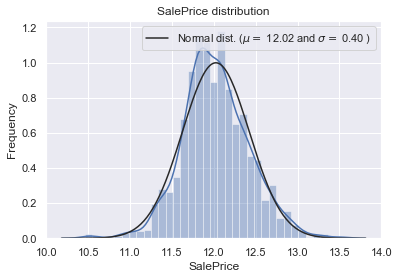

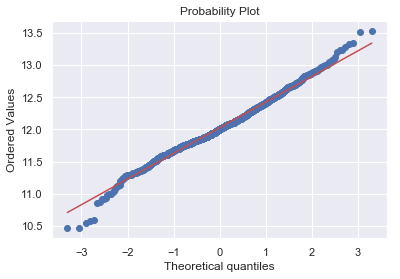

In [18]:
train_data1["SalePrice"] = np.log1p(train_data1["SalePrice"])

#Check the new distribution 
sns.distplot(train_data1['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data1['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data1['SalePrice'], plot=plt)
plt.show()

In [19]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn import linear_model
import xgboost as xgb


n_folds = 10

def metrics_cv(model,X,y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kf))
    #print(rmse)
    r2= cross_val_score(model, X.values, y, scoring="r2", cv = kf)
    #print(r2)
    return(rmse,r2)




In [20]:
#Multiple regression
def Multiple_regression(data):
    reg1 = linear_model.LinearRegression()
    rmse_result, r2_result = metrics_cv(reg1,data,train_data1['SalePrice'])
    print("\nMultiple regression score:\n mean squared error: {:.4f} \n R^2: {:.4f}\n".format(rmse_result.mean(), r2_result.mean()))
Multiple_regression(all_data)
Multiple_regression(small_train_set)


Multiple regression score:
 mean squared error: 509779708.5001 
 R^2: -3448658133122633216.0000


Multiple regression score:
 mean squared error: 0.1620 
 R^2: 0.8325



In [21]:
# Ridge regression
def Ridge_regression(data):
    reg2= linear_model.Ridge(alpha=.5)
    rmse_result, r2_result = metrics_cv(reg2,data,train_data1['SalePrice'])
    print("\nRidge regression score:\n mean squared error: {:.4f} \n R^2: {:.4f}\n".format(rmse_result.mean(), r2_result.mean()))
Ridge_regression(all_data)
Ridge_regression(small_train_set)
    



Ridge regression score:
 mean squared error: 0.1268 
 R^2: 0.8963


Ridge regression score:
 mean squared error: 0.1620 
 R^2: 0.8325



In [22]:
# Lasso regression
def Lasso_regression(data):
    reg3 = linear_model.Lasso(alpha =0.0005)
    rmse_result, r2_result = metrics_cv(reg3,data,train_data1['SalePrice'])
    print("\nlasso regression score:\n mean squared error: {:.4f} \n R^2: {:.4f}\n".format(rmse_result.mean(), r2_result.mean()))
Lasso_regression(all_data)
Lasso_regression(small_train_set)



lasso regression score:
 mean squared error: 0.1171 
 R^2: 0.9120


lasso regression score:
 mean squared error: 0.1620 
 R^2: 0.8325



In [23]:
# Elastic net
def Elastic_net(data):
    reg3=ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
    rmse_result, r2_result = metrics_cv(reg3,data,train_data1['SalePrice'])
    print("\nElastic net score:\n mean squared error: {:.4f} \n R^2: {:.4f}\n".format(rmse_result.mean(), r2_result.mean()))
Elastic_net(all_data)
Elastic_net(small_train_set)



Elastic net score:
 mean squared error: 0.1170 
 R^2: 0.9121


Elastic net score:
 mean squared error: 0.1620 
 R^2: 0.8325



In [24]:
# SVR
from sklearn.svm import SVR
def svr(data):
    reg5 = SVR(gamma='scale', C=1.0, epsilon=0.2)
    rmse_result, r2_result = metrics_cv(reg5,data,train_data1['SalePrice'])
    print("\nSVR score:\n mean squared error: {:.4f} \n R^2: {:.4f}\n".format(rmse_result.mean(), r2_result.mean()))
svr(all_data)
svr(small_train_set)


SVR score:
 mean squared error: 0.1544 
 R^2: 0.8473


SVR score:
 mean squared error: 0.2511 
 R^2: 0.5991



In [28]:
def Gradient_boosting_regressor(data):    
    reg6 = GradientBoostingRegressor()
    rmse_result, r2_result = metrics_cv(reg6,data,train_data1['SalePrice'])
    print("\nMultiple regression score:\n mean squared error: {:.4f} \n R^2: {:.4f}\n".format(rmse_result.mean(), r2_result.mean()))
Gradient_boosting_regressor(all_data)
Gradient_boosting_regressor(small_train_set)


Multiple regression score:
 mean squared error: 0.1300 
 R^2: 0.8914


Multiple regression score:
 mean squared error: 0.1605 
 R^2: 0.8362



In [29]:


def XGB_Regressor(data):  
    reg7 = xgb.XGBRegressor()
    rmse_result, r2_result = metrics_cv(reg7,data,train_data1['SalePrice'])
    print("\nMultiple regression score:\n mean squared error: {:.4f} \n R^2: {:.4f}\n".format(rmse_result.mean(), r2_result.mean()))
XGB_Regressor(all_data)
XGB_Regressor(small_train_set)



Multiple regression score:
 mean squared error: 0.1327 
 R^2: 0.8878


Multiple regression score:
 mean squared error: 0.1592 
 R^2: 0.8382



In [30]:
def Random_forest_reg(data):
    reg8 = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
    rmse_result, r2_result = metrics_cv(reg8,data,train_data1['SalePrice'])
    print("\nRandom forest score:\n mean squared error: {:.4f} \n R^2: {:.4f}\n".format(rmse_result.mean(), r2_result.mean()))
Random_forest_reg(all_data)
Random_forest_reg(small_train_set)


Random forest score:
 mean squared error: 0.2386 
 R^2: 0.6373


Random forest score:
 mean squared error: 0.2330 
 R^2: 0.6553



In [ ]:
missing_val=(train_data.isnull().sum()/len(train_data))*100
missing_val = missing_val.drop(missing_val[missing_val ==0].index)
#missing_some=missing_val.drop(missing_val[missing_val >15].index)
missing_some=missing_val.drop(missing_val[missing_val >15].index)
missing_alot=missing_val.drop(missing_val[missing_val <15].index)
#print(missing_some)
#missing_some._get_numeric_data()
#index_array = missing_val.index
#train_ver1 = train_data

#print(missing_alot)
ini_num=pd.DataFrame()

for i in missing_some.index:
    ini_num=pd.concat([ini_num,train_data[i]], axis=1, sort=False)
for i in missing_alot.index:
    ini_num=pd.concat([ini_num,train_data[i]], axis=1, sort=False)
    #print(select_some)
#print(ini_num)
mean_val=ini_num['MasVnrArea'].mean()
num_filled=ini_num['MasVnrArea'].fillna(mean_val)
ini_num=pd.concat([ini_num,train_data["GarageYrBlt"]], axis=1, sort=False)
#select_some_char= select_some.drop(select_some._get_numeric_data())

#print(num_filled)
ini_num.drop(columns=['MasVnrArea'],inplace=True)
train_data['MasVnrArea']=num_filled






Garageyr =train_data["GarageYrBlt"]
Garageyr.replace(['nan'], np.nan, inplace = True)
Garageyr.dropna(inplace=True)
val2005=Garageyr.value_counts().idxmax()

Garageyr_fill=pd.read_csv('train.csv')
Garageyr_fill=Garageyr_fill["GarageYrBlt"]
Garageyr_fill.replace(['NaN'], np.nan, inplace = True)
Garageyr_fill.fillna(float(val2005),inplace=True)

print(ini_num)
for i in ini_num.columns:
    most_frequnt=ini_num[i].value_counts().idxmax()
    #print(most_frequnt)
    ini_num.fillna(value=most_frequnt,inplace=True)
ini_num['GarageYrBlt']=Garageyr_fill

for i in ini_num.columns:
    train_data[i]=ini_num[i]

train_data1=train_data
#print(Garageyr_fill)

#print(most_frequnt_Garageyr)

missing_val=(train_data.isnull().sum()/len(train_data))*100
missing_val = missing_val.drop(missing_val[missing_val ==0].index)
print(missing_val)
#ini_num
#for i in select_some_num.column
#for i in index_array:
#select_some_num
#train_ver1=train_ver1.drop